In [1]:
'''import pandas as pd

# Load the datasets
file1 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/vin_to_mpg_correct.csv"
file2 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/merged_dataset.csv"

df1 = pd.read_csv(file1)  # Load MPG dataset
df2 = pd.read_csv(file2)  # Load larger dataset

# Convert column names to lowercase
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

# Rename "model year" and "my" to a common name (e.g., "my")
df1.rename(columns={"model year": "my"}, inplace=True)

# Extract the first 500 rows from the larger dataset
df2_subset = df2.head(500)

# Merge the two datasets on VIN
merged_df = pd.merge(df2_subset, df1, on="vin", how="inner")

# Save the merged dataset to a new CSV file
output_file = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/final_dataset_with_corrected_mpg.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged dataset saved as {output_file}")'''

'import pandas as pd\n\n# Load the datasets\nfile1 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/vin_to_mpg_correct.csv"\nfile2 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/merged_dataset.csv"\n\ndf1 = pd.read_csv(file1)  # Load MPG dataset\ndf2 = pd.read_csv(file2)  # Load larger dataset\n\n# Convert column names to lowercase\ndf1.columns = df1.columns.str.lower()\ndf2.columns = df2.columns.str.lower()\n\n# Rename "model year" and "my" to a common name (e.g., "my")\ndf1.rename(columns={"model year": "my"}, inplace=True)\n\n# Extract the first 500 rows from the larger dataset\ndf2_subset = df2.head(500)\n\n# Merge the two datasets on VIN\nmerged_df = pd.merge(df2_subset, df1, on="vin", how="inner")\n\n# Save the merged dataset to a new CSV file\noutput_file = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/final_dataset_with_corrected_mpg.csv"\nmerged_df.to_csv(output_file, index=False)\n\nprint(f"Merged dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/final_dataset_with_corrected_mpg.csv"  # Change path as needed
df = pd.read_csv(file_path)

# Drop 'vin' column as it's just an identifier
df = df.drop(columns=['vin'])

# Remove rows where combination_mpg contains 'No data found'
df = df[df['combination mpg'] != 'No data found']

# Convert combination_mpg to numeric
df['combination mpg'] = pd.to_numeric(df['combination mpg'])

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['test date', 'purchase date'], errors='ignore')

In [3]:
print(df['combination mpg'].describe())

count    461.000000
mean      23.349241
std        5.588181
min       12.000000
25%       20.000000
50%       23.000000
75%       26.000000
max       55.000000
Name: combination mpg, dtype: float64


### Combination MPG Statistics:

The combination_mpg values range between 12 and 55, with an average of 23.35 MPG.

The majority of the data falls between 20 and 26 MPG (interquartile range).


In [4]:
correlation = df.corr(numeric_only=True)['combination mpg'].sort_values(ascending=False)
print(correlation)

combination mpg    1.000000
my                 0.328042
zipcode            0.048983
odometer          -0.168440
Name: combination mpg, dtype: float64


### Correlation Analysis:
The correlation between model year (MY) and combination MPG is 0.328, indicating a slight positive relationship.

Odometer readings show a weak negative correlation (-0.168) with combination MPG, suggesting that higher mileage vehicles tend to have lower fuel efficiency.
Other numerical features, such as ZIP code, have minimal correlation with fuel efficiency.

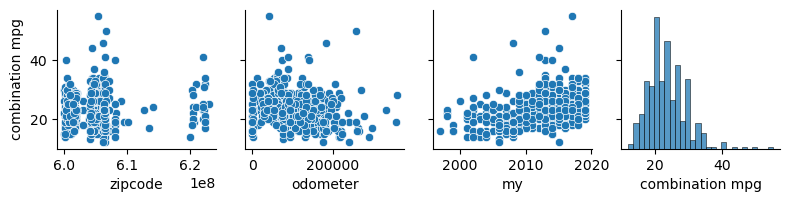

In [5]:
sns.pairplot(df, y_vars=['combination mpg'], height=2)
plt.show()

### Scatter Plot Observations:

There are no strong linear relationships between combination MPG and other numerical variables.
The data distribution is widely spread, indicating possible dependencies on categorical factors rather than purely numerical ones.

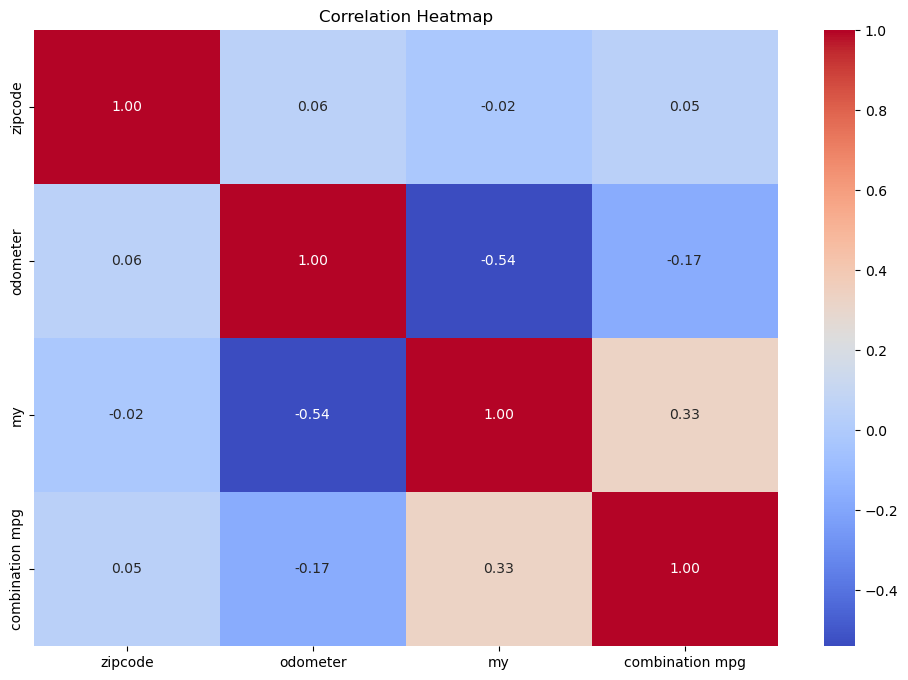

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Heatmap Insights:

The correlation heatmap confirms that no single numerical variable is a strong predictor of fuel efficiency.

Model year shows the most noticeable relationship, likely due to improvements in fuel efficiency over time.

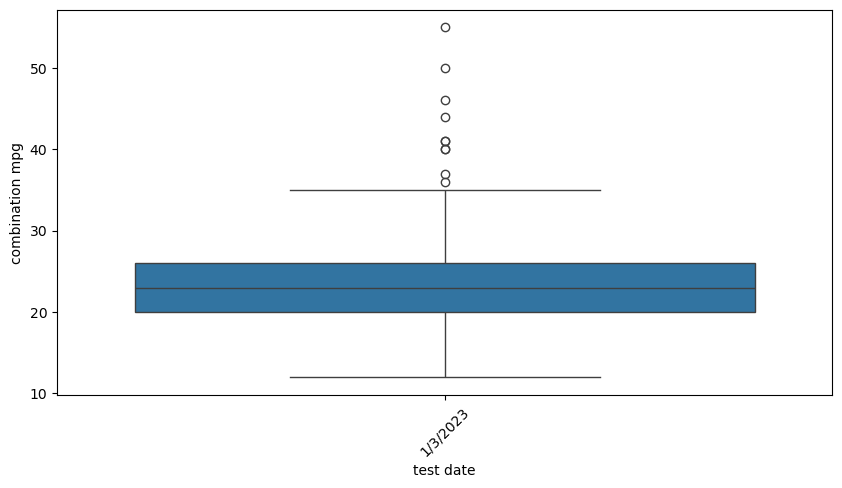

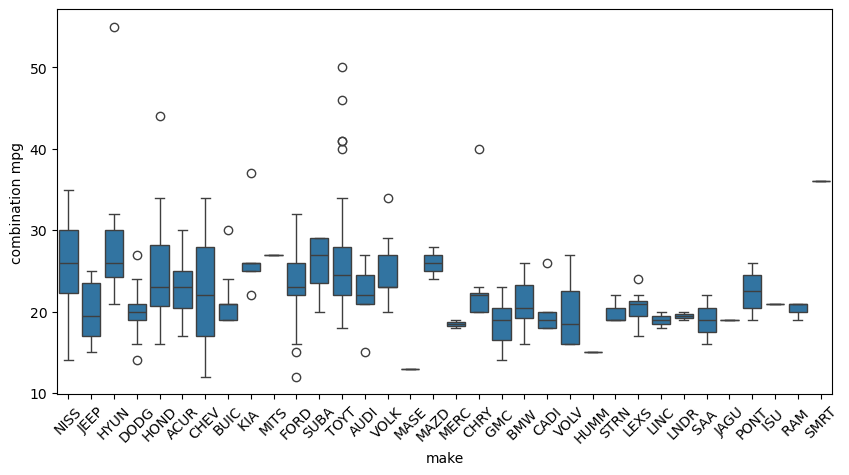

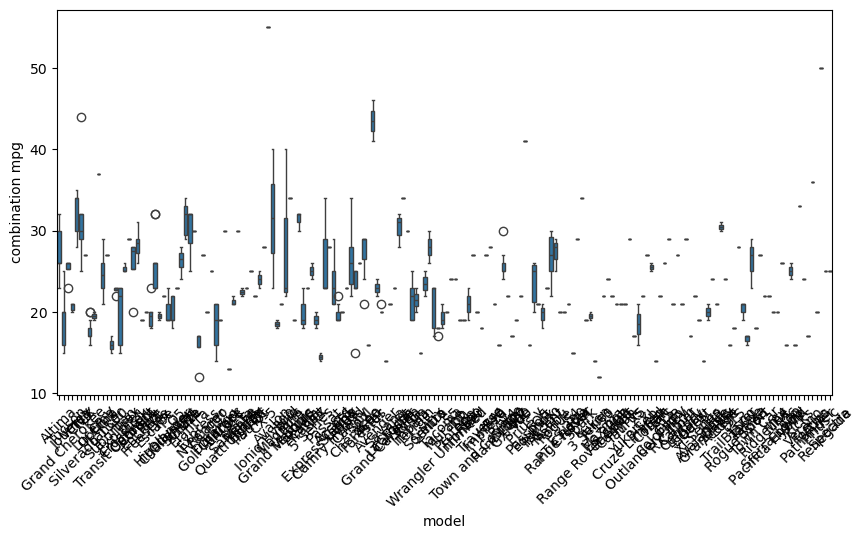

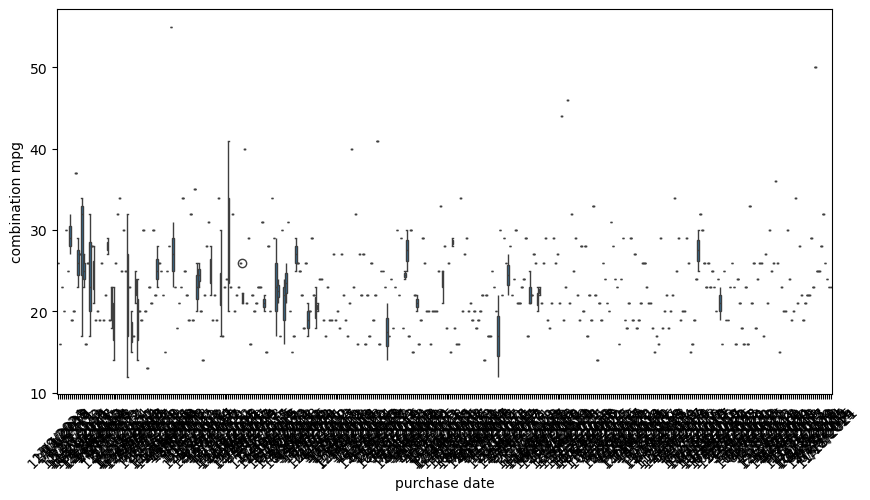

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='combination mpg')
    plt.xticks(rotation=45)
    plt.show()

### Categorical Influence on MPG:

Box plots suggest potential variations in combination MPG based on categorical attributes.
Factors such as vehicle type, fuel type, and transmission may contribute more significantly to fuel efficiency differences.

### Final Conclusion
Fuel efficiency (combination MPG) has weak correlations with numerical attributes like odometer readings and ZIP codes.

Model year (MY) shows the highest correlation (0.328) with MPG, indicating that newer vehicles tend to be more fuel-efficient.

No strong linear relationships exist between combination MPG and numerical variables, suggesting that other factors influence fuel efficiency.

Categorical attributes (vehicle type, fuel type, transmission) may play a more significant role in determining MPG.

Higher mileage vehicles tend to have slightly lower fuel efficiency, but the correlation remains weak (-0.168).

Future analysis should focus on categorical attributes and external factors like maintenance history, driving conditions, and fuel types to better understand variations in fuel efficiency.